# Online Shoppers Purchasing Intention
[Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

__Data Dictionary__

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.shape

(12330, 18)

In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.describe(include='O').T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


In [9]:
# Check for Null Values
df.isnull().sum().sum()

0

In [10]:
# Check for duplicates
df.duplicated().sum()

125

In [11]:
# Check Conversion Rate (Revenue) for duplicate entries
df[df.duplicated()]['Revenue'].value_counts()

False    125
Name: Revenue, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [13]:
# Given Conversion Rate For the Year
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [14]:
import pandas_profiling as pp

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(12205, 18)

In [18]:
df['Weekend'] = df['Weekend'].map({False:0, True:1})
df['Revenue'] = df['Revenue'].map({False:0, True:1})

### Univariate Analysis

0    10297
1     1908
Name: Revenue, dtype: int64
0    0.843671
1    0.156329
Name: Revenue, dtype: float64


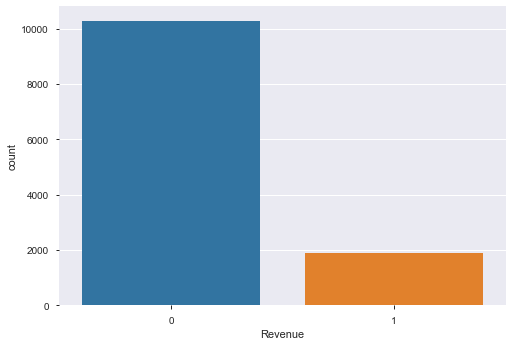

In [20]:
print(df['Revenue'].value_counts())
print(df['Revenue'].value_counts(normalize=True))
sns.countplot(df['Revenue'])
plt.show()

The baseline revenue generation through Online Shoppers for the given year is **15.63%**.  

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64


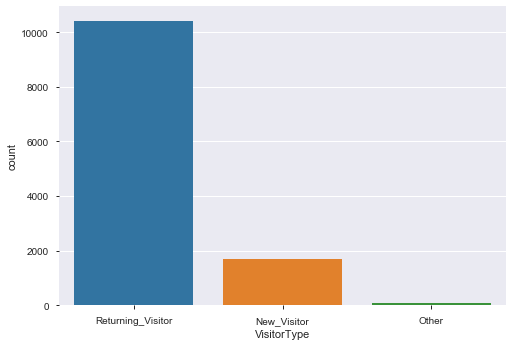

In [21]:
print(df['VisitorType'].value_counts())
sns.countplot(df['VisitorType']);

VisitorType        Revenue
New_Visitor        0          0.750738
                   1          0.249262
Other              0          0.802469
                   1          0.197531
Returning_Visitor  0          0.859074
                   1          0.140926
Name: Revenue, dtype: float64


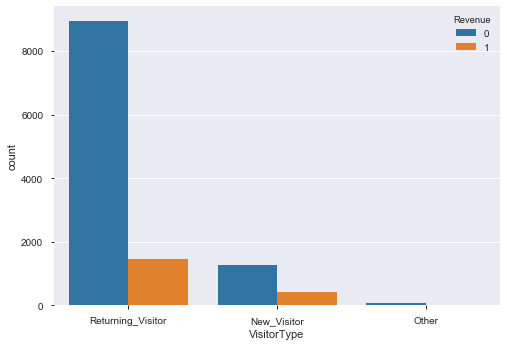

In [28]:
print(df.groupby('VisitorType')['Revenue'].value_counts(normalize=True))
sns.countplot(df['VisitorType'], hue=df['Revenue']);

In [26]:
df.groupby('VisitorType')['Revenue'].value_counts()/df.shape[0]

VisitorType        Revenue
New_Visitor        0          0.104138
                   1          0.034576
Other              0          0.005326
                   1          0.001311
Returning_Visitor  0          0.734207
                   1          0.120442
Name: Revenue, dtype: float64

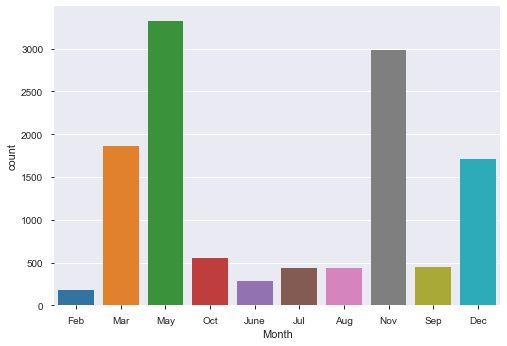

In [20]:
sns.countplot(df['Month']);

In [65]:
num_cols = ['Administrative','Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

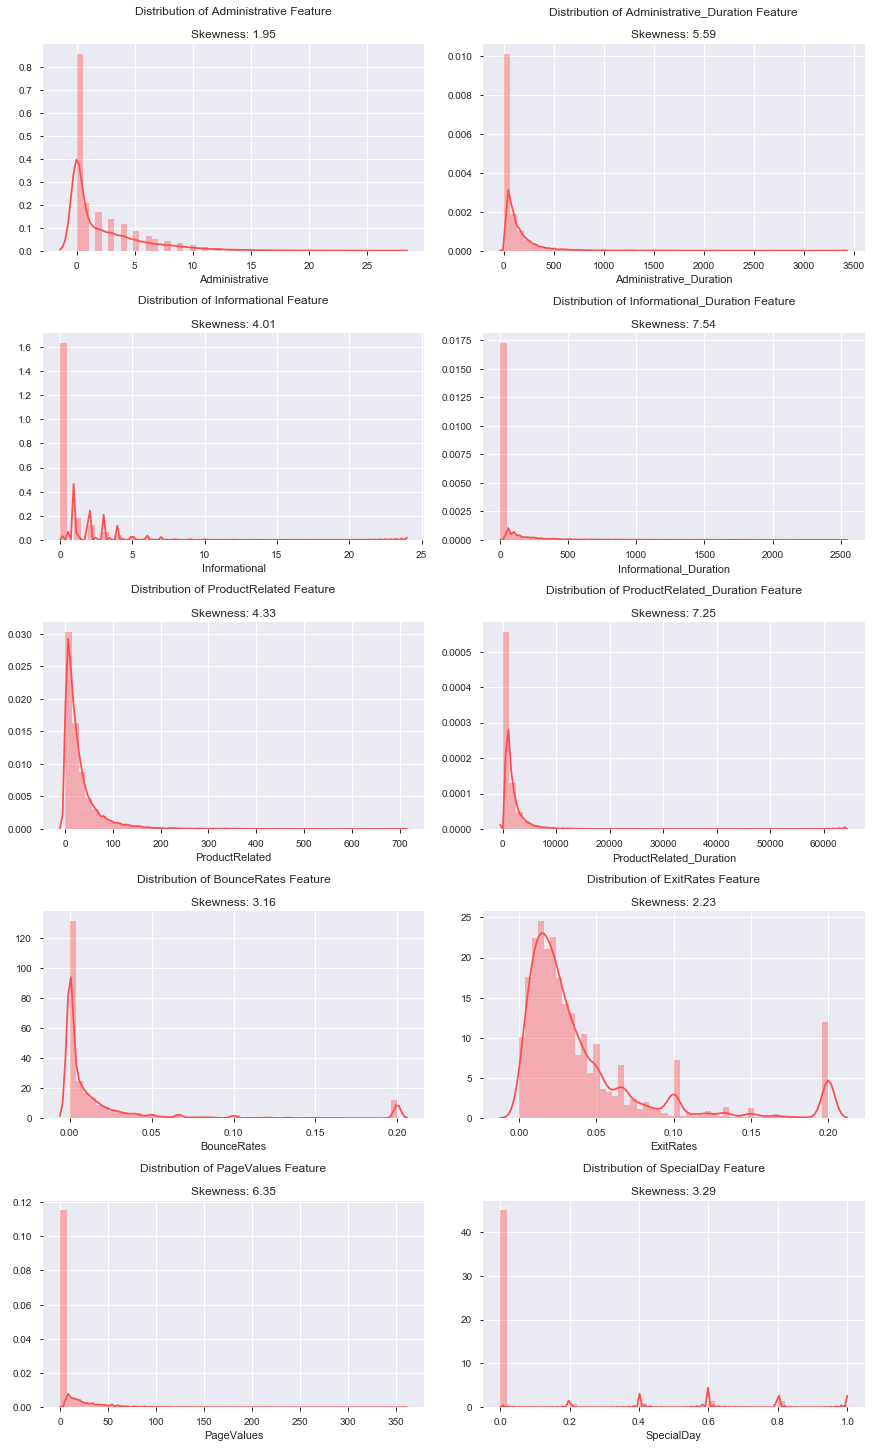

In [67]:
figs, axes = plt.subplots(5,2, figsize=(12,20), constrained_layout=True)
for col, ax in zip(num_cols, axes.flat):
    sns.distplot(df[col], ax=ax, color='#ff4d4d')
    ax.set_title("Distribution of {} Feature\n\nSkewness: {}".format(col, round(df[col].skew(),2)))
plt.show()

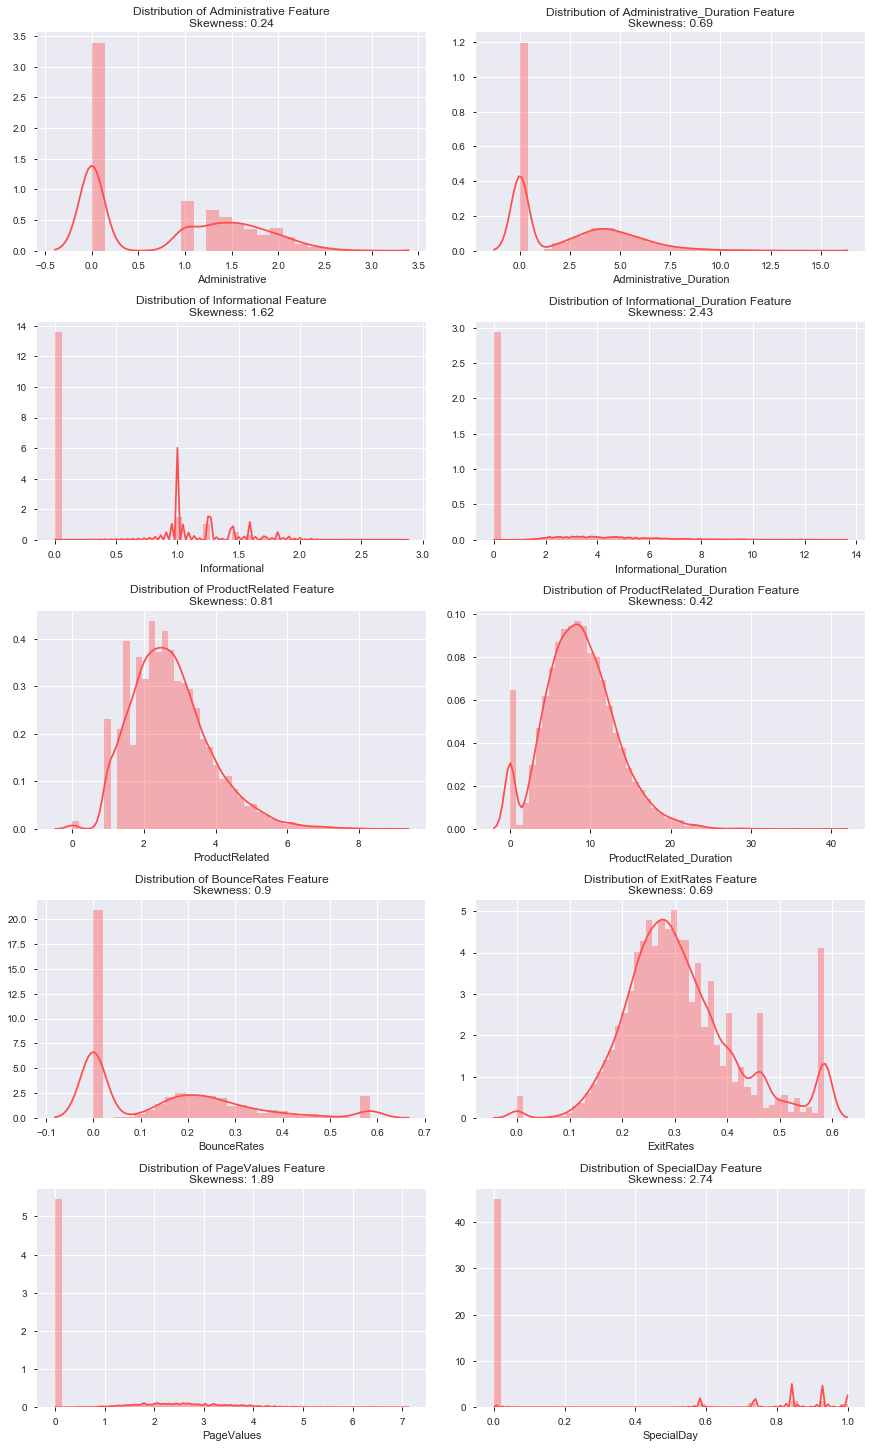

In [68]:
figs, axes = plt.subplots(5,2, figsize=(12,20), constrained_layout=True)
for col, ax in zip(num_cols, axes.flat):
    sns.distplot(np.cbrt(df[col]), ax=ax, color='#ff4d4d')
    ax.set_title("Distribution of {} Feature\nSkewness: {}".format(col, round(np.cbrt(df[col]).skew(),2)))
plt.show()

In [85]:
transformed_df = pd.DataFrame({'Features': num_cols, 'Skewness': np.round(df[num_cols].skew().values,2), 
                               'Log_T': np.round(np.log1p(df[num_cols]).skew().values,2),
                               'Sqrt_T': np.round(np.sqrt(df[num_cols]).skew().values,2),
                               'Cbrt_T': np.round(np.cbrt(df[num_cols]).skew().values,2),
                               '4thPower_T': np.round(np.power(df[num_cols],1/4).skew().values,2),
                               '5thPower_T': np.round(np.power(df[num_cols],1/5).skew().values,2)})
transformed_df

,Features,Skewness,Log_T,Sqrt_T,Cbrt_T,4thPower_T,5thPower_T
0,Administrative,1.95,0.55,0.63,0.24,0.08,0.00
1,Administrative_Duration,5.59,0.24,1.53,0.69,0.37,0.21
2,Informational,4.01,2.01,1.93,1.62,1.51,1.46
3,Informational_Duration,7.54,1.90,3.42,2.43,2.05,1.87
4,ProductRelated,4.33,-0.04,1.50,0.81,0.45,0.19
5,ProductRelated_Duration,7.25,-1.43,1.41,0.42,-0.21,-0.72
6,BounceRates,3.16,3.08,1.72,0.90,0.48,0.26
7,ExitRates,2.23,2.13,1.21,0.69,0.26,-0.17
8,PageValues,6.35,1.79,2.52,1.89,1.66,1.54
9,SpecialDay,3.29,3.10,2.86,2.74,2.70,2.67


In [86]:
transformed_df.to_csv('transformedvalues_df.csv', index=False)

In [39]:
print("Average Time Spent on Administrative Page:", round(np.mean(df['Administrative_Duration']),2))
print("Average Time Spent on Informational Page:", round(np.mean(df['Informational_Duration']),2))
print("Average Time Spent on ProductRelated Page:", round(np.mean(df['ProductRelated_Duration']),2))

Average Time Spent on Administrative Page: 81.65
Average Time Spent on Informational Page: 34.83
Average Time Spent on ProductRelated Page: 1206.98


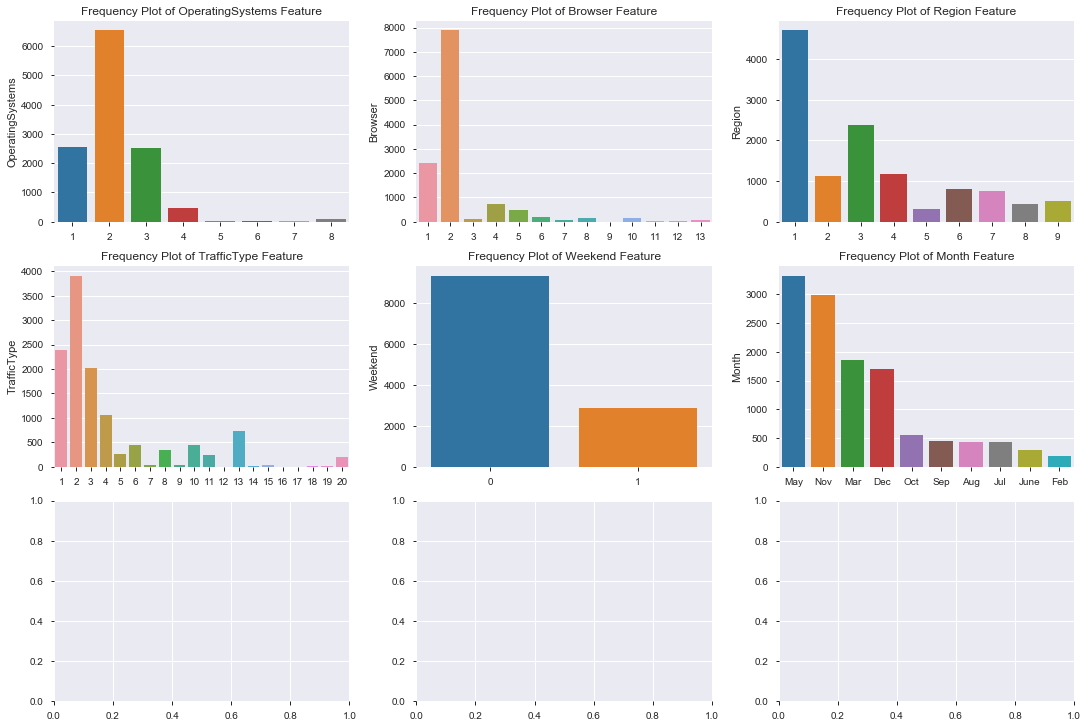

In [52]:
cat_cols = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month']
figs, axes = plt.subplots(3,3, figsize=(15,10), constrained_layout=True)
for col, ax in zip(cat_cols, axes.flat):
    sns.barplot(df[col].value_counts().index, df[col].value_counts(), ax=ax)
    ax.set_title("Frequency Plot of {} Feature".format(col))
plt.show()

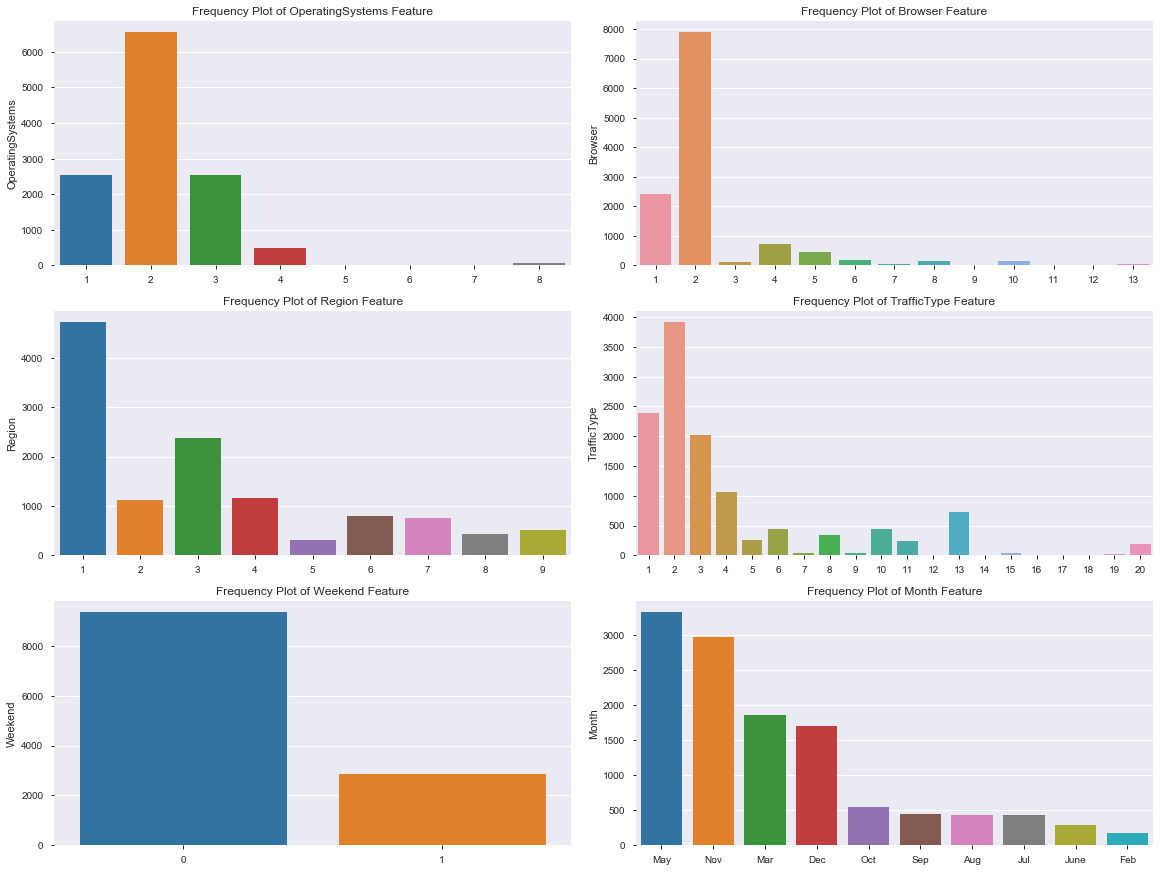

In [57]:
cat_cols = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month']
figs, axes = plt.subplots(3,2, figsize=(16,12), constrained_layout=True)
for col, ax in zip(cat_cols, axes.flat):
    sns.barplot(df[col].value_counts().index, df[col].value_counts(), ax=ax)
    ax.set_title("Frequency Plot of {} Feature".format(col))
plt.show()

__Observations:__

- Mostly used OSes are: 2, 3 & 1.
- Mostly used browser are: 2 & 1.
- Traffic type is mostly via: 1, 2, 3, 4& 13.
- People mostly visit on weekdays.
- Majority of customers are from region 1 & 3.
- Average time spent on ProductRelated pages is more than Administrative and Informational Pages.

In [92]:
cat_cols = ['OperatingSystems', 'Browser', 'Region', 'VisitorType','TrafficType', 'Weekend', 'Month', 'SpecialDay']

### Bivariate Analysis

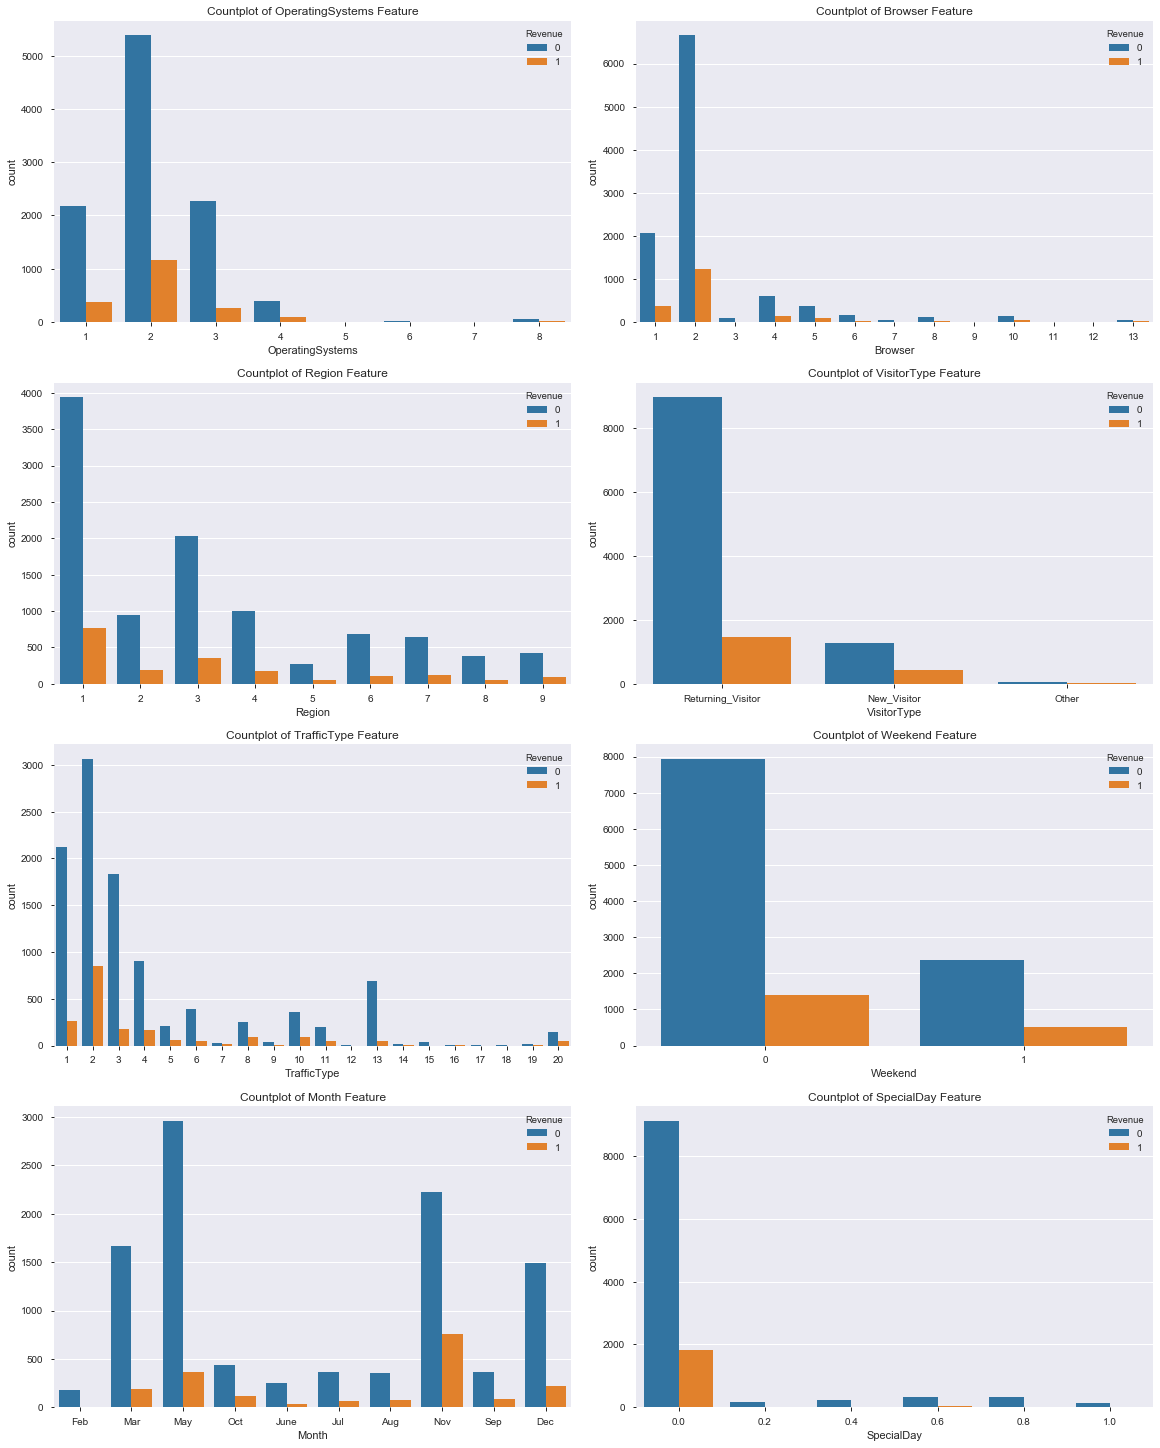

In [93]:
figs, axes = plt.subplots(4,2, figsize=(16,20), constrained_layout=True)
for col, ax in zip(cat_cols, axes.flat):
    sns.countplot(df[col], hue=df['Revenue'], ax=ax)
    ax.set_title("Countplot of {} Feature".format(col))
plt.show()

__Observations:__

- Revenue is more on Weekdays.
- November has contributed the most in revenue followed by May & December while February followed by June has contributed the least.
- More revenue is generated from the Returning visitors.
- OS Type '2' has generated the most revenue followed by Type '1'.
- Browser Type '2' has generated the most revenue followed by Type '1'.
- Traffic Type '2' has generated the most revenue followed by Type '1' and '3'.
- Majority of revenue are from Region 1, 3 & 4.

In [ ]:
sns.barplot(df.TrafficType, df.PageValues, hue = df.Revenue, ci = None);

#### What is the fraction of Special Day every month?

In [40]:
df.groupby(['Month','SpecialDay'])['Revenue'].value_counts(normalize=True)

Month  SpecialDay  Revenue
Aug    0.0         0          0.824480
                   1          0.175520
Dec    0.0         0          0.873388
                   1          0.126612
Feb    0.0         0          0.990196
                   1          0.009804
       0.2         0          1.000000
       0.4         0          1.000000
       0.6         0          1.000000
       0.8         0          0.947368
                   1          0.052632
       1.0         0          0.800000
                   1          0.200000
Jul    0.0         0          0.847222
                   1          0.152778
June   0.0         0          0.898246
                   1          0.101754
Mar    0.0         0          0.896774
                   1          0.103226
May    0.0         0          0.865679
                   1          0.134321
       0.2         0          0.914110
                   1          0.085890
       0.4         0          0.941441
                   1          0.05855

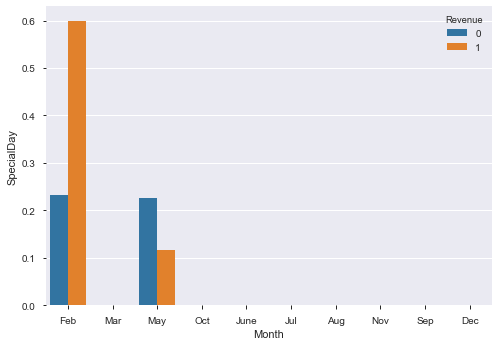

In [38]:
sns.barplot(df.Month, df.SpecialDay, hue = df.Revenue, ci = None);

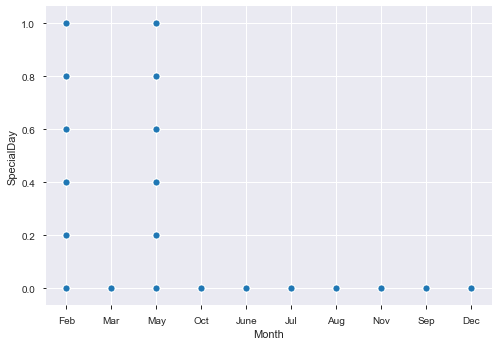

In [99]:
sns.scatterplot(df['Month'], df['SpecialDay'])

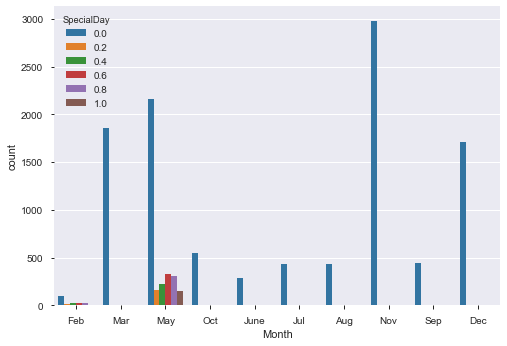

Month  Revenue
Aug    0           2.925031
       1           0.622696
Dec    0          12.208111
       1           1.769766
Feb    0           1.458419
       1           0.024580
Jul    0           2.998771
       1           0.540762
June   0           2.097501
       1           0.237608
Mar    0          13.666530
       1           1.573126
May    0          24.285129
       1           2.990578
Nov    0          18.205653
       1           6.226956
Oct    0           3.555920
       1           0.942237
Sep    0           2.965998
       1           0.704629
Name: Revenue, dtype: float64


In [45]:
sns.countplot(df['Month'], hue=df['SpecialDay'])
plt.show()
print((df.groupby('Month')['Revenue'].value_counts()/df.shape[0])*100)

In [48]:
0.02+1.57+2.99+0.24+0.54+0.62+0.70+0.94+6.23+1.77

15.620000000000001

In [47]:
df.Revenue.value_counts(normalize=True)

0    0.843671
1    0.156329
Name: Revenue, dtype: float64

#### what is the proportion of users likely to make a transaction in our dataframe?

In [28]:
df['Revenue'].mean()

0.15632937320770177

#### What are average values of numerical features for users likely to make a transaction?

In [29]:
df[df['Revenue'] == 1].mean()

Administrative                3.393606
Administrative_Duration     119.483244
Informational                 0.786164
Informational_Duration       57.611427
ProductRelated               48.210168
ProductRelated_Duration    1876.209615
BounceRates                   0.005117
ExitRates                     0.019555
PageValues                   27.264518
SpecialDay                    0.023166
OperatingSystems              2.092767
Browser                       2.453354
Region                        3.082285
TrafficType                   4.021488
Weekend                       0.261530
Revenue                       1.000000
dtype: float64

Average time spent by user on Product is 1876.209615. 

### Multivariate Analysis

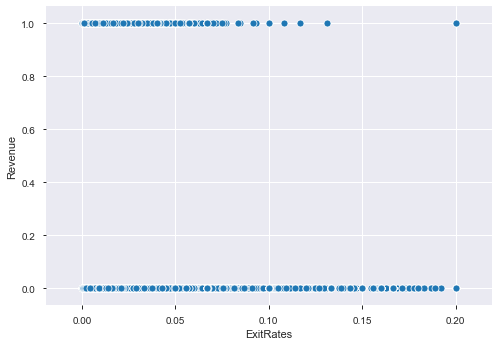

In [53]:
sns.scatterplot(df.ExitRates,df.Revenue);

In [62]:
df[(df['ExitRates'] >= 0.2) & (df['Revenue'] == 1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6700,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Oct,2,5,1,20,Returning_Visitor,0,1
7600,0,0.0,0,0.0,3,0.0,0.2,0.2,0.0,0.0,Nov,3,2,1,11,Returning_Visitor,0,1
10789,1,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,3,2,3,8,Returning_Visitor,0,1


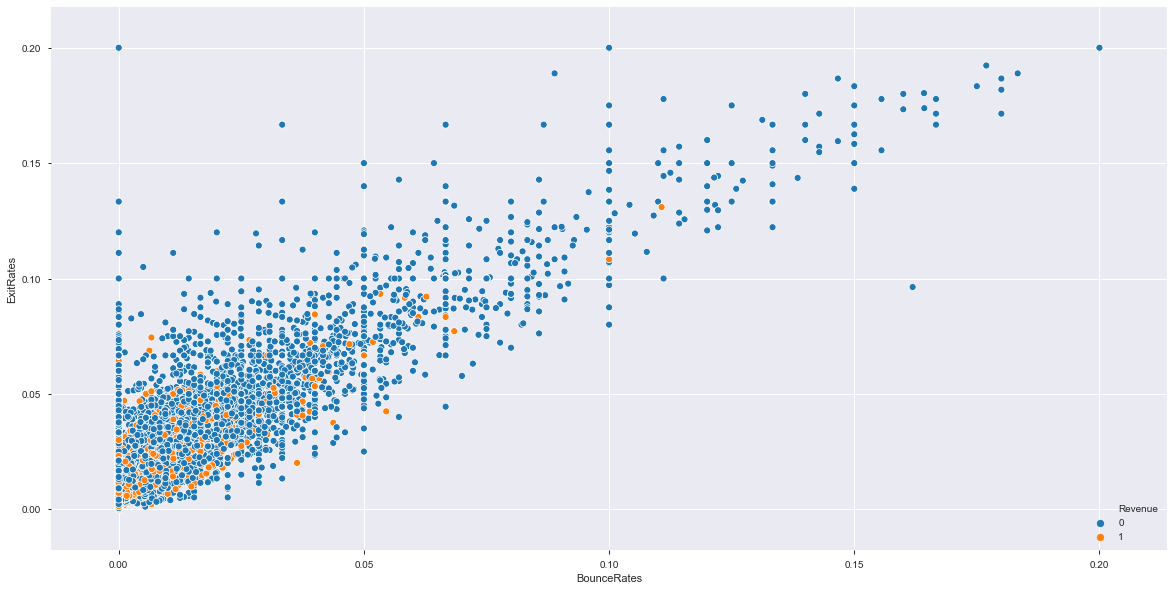

In [104]:
plt.figure(figsize=(20,10))
sns.scatterplot(df.BounceRates,df.ExitRates,hue=df.Revenue);

<Figure size 1440x720 with 0 Axes>

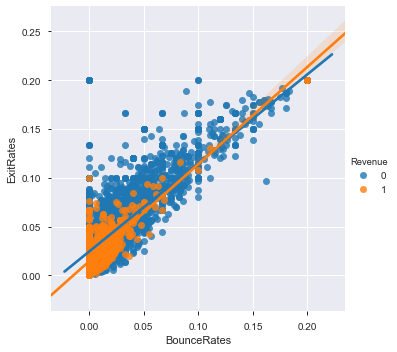

In [108]:
plt.figure(figsize=(20,10))
sns.lmplot('BounceRates','ExitRates',hue='Revenue', data=df)
plt.show()

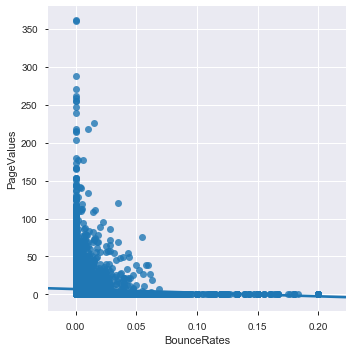

In [121]:
sns.lmplot('BounceRates','PageValues', data=df);

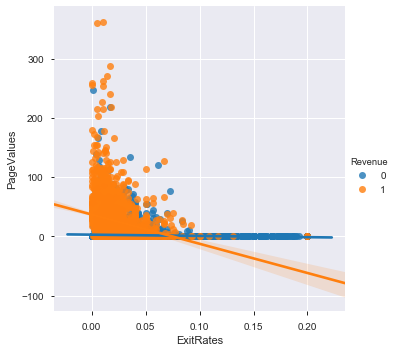

In [103]:
sns.lmplot('ExitRates','PageValues',hue='Revenue', data=df);

- More page values less exit rates.
- Revenue is also more with increase in page values.

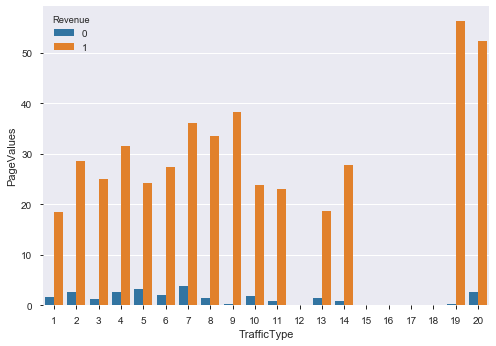

In [31]:
sns.barplot(df.TrafficType, df.PageValues, hue = df.Revenue, ci = None);

- Traffic Type 19 & 20 encountered more page values along with increase in Revenue generation.

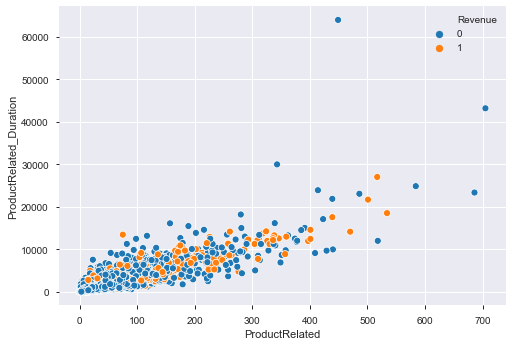

In [32]:
sns.scatterplot(df.ProductRelated, df.ProductRelated_Duration, hue = df.Revenue);

- Linear relationship between product related pages and duration spent with increase in revenue but after a point no revenue. 
        Assumption: User might be getting confused due to too many choice out there.

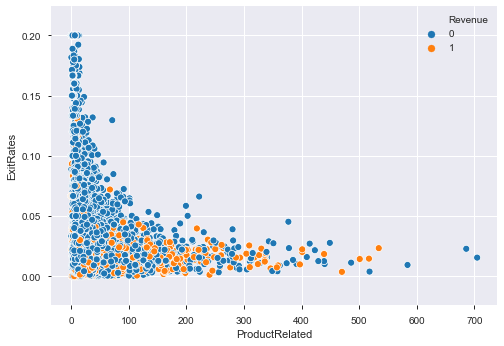

In [33]:
sns.scatterplot(df.ProductRelated, df.ExitRates, hue = df.Revenue);

- Exit rate decreases with increase in product pages, also positive revenue starts showing.

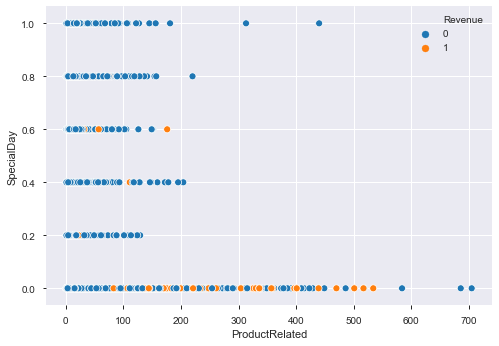

In [34]:
sns.scatterplot(df.ProductRelated, df.SpecialDay, hue = df.Revenue);

- Speical Day doesn't seem to impact much on the revenue.

__Observations:__

- For the revenue to be generated administrative visits are more assuming user needs to login to make payments.
- For product related visits there is no relation with revenue ,both are equally likely.
- Bounce rate & exit rate is more in case of revenue not being generated.
- More page views leads to more revenue.

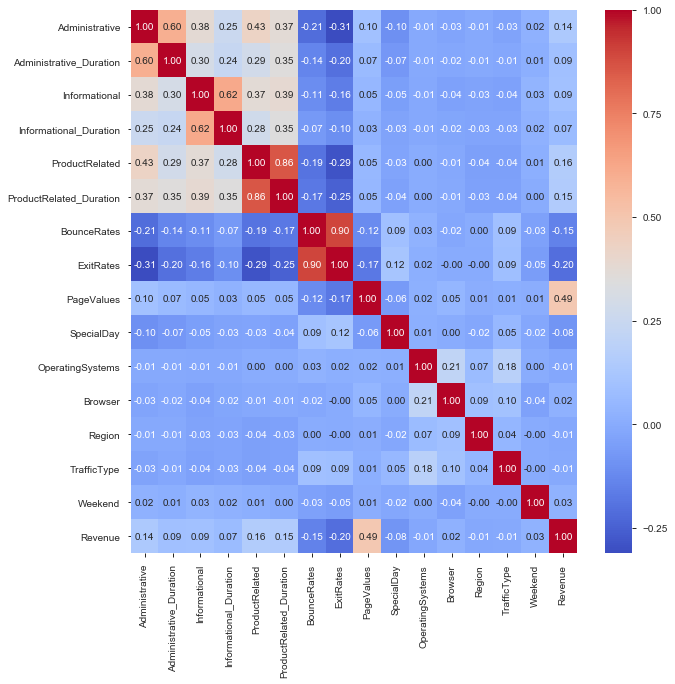

In [117]:
plt.figure(figsize=[10,10])
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.ylim(16, 0)
plt.show()

In [119]:
# Find all correlations and sort 
correlations_data = df.corr()['Revenue'].sort_values()

# Print the most negative correlations
print(correlations_data.head(10), '\n')

# Print the most positive correlations
print(correlations_data.tail(10))

ExitRates                 -0.204320
BounceRates               -0.145091
SpecialDay                -0.083601
OperatingSystems          -0.014927
Region                    -0.012725
TrafficType               -0.005618
Browser                    0.024052
Weekend                    0.027729
Informational_Duration     0.069358
Administrative_Duration    0.091768
Name: Revenue, dtype: float64 

Browser                    0.024052
Weekend                    0.027729
Informational_Duration     0.069358
Administrative_Duration    0.091768
Informational              0.093626
Administrative             0.136330
ProductRelated_Duration    0.150077
ProductRelated             0.156042
PageValues                 0.491894
Revenue                    1.000000
Name: Revenue, dtype: float64


In [122]:
df['Administrative'] = np.power(df['Administrative'],1/5)
df['Administrative_Duration'] = np.power(df['Administrative_Duration'],1/5)
df['Informational'] = np.power(df['Informational'],1/5)
df['Informational_Duration'] = np.power(df['Informational_Duration'],1/5)
df['ProductRelated'] = np.log1p(df['ProductRelated'])
df['ProductRelated_Duration'] = np.power(df['ProductRelated_Duration'],1/4)
df['BounceRates'] = np.power(df['BounceRates'],1/5)
df['ExitRates'] = np.power(df['ExitRates'],1/5)
df['PageValues'] = np.power(df['PageValues'],1/5)

In [125]:
df['SpecialDay'] = df['SpecialDay'].astype('category')

In [126]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,1.098612,2.828427,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.0,0.0,0.693147,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,1.098612,1.277886,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,2.397895,5.004993,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12205 non-null float64
Administrative_Duration    12205 non-null float64
Informational              12205 non-null float64
Informational_Duration     12205 non-null float64
ProductRelated             12205 non-null float64
ProductRelated_Duration    12205 non-null float64
BounceRates                12205 non-null float64
ExitRates                  12205 non-null float64
PageValues                 12205 non-null float64
SpecialDay                 12205 non-null category
Month                      12205 non-null object
OperatingSystems           12205 non-null int64
Browser                    12205 non-null int64
Region                     12205 non-null int64
TrafficType                12205 non-null int64
VisitorType                12205 non-null object
Weekend                    12205 non-null int64
Revenue                    12205 non-null int64
dtyp

### Preprocessing & Base Model

In [128]:
df2 = pd.get_dummies(df, drop_first=True)

In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 31 columns):
Administrative                   12205 non-null float64
Administrative_Duration          12205 non-null float64
Informational                    12205 non-null float64
Informational_Duration           12205 non-null float64
ProductRelated                   12205 non-null float64
ProductRelated_Duration          12205 non-null float64
BounceRates                      12205 non-null float64
ExitRates                        12205 non-null float64
PageValues                       12205 non-null float64
OperatingSystems                 12205 non-null int64
Browser                          12205 non-null int64
Region                           12205 non-null int64
TrafficType                      12205 non-null int64
Weekend                          12205 non-null int64
Revenue                          12205 non-null int64
SpecialDay_0.2                   12205 non-null uint8
SpecialDa

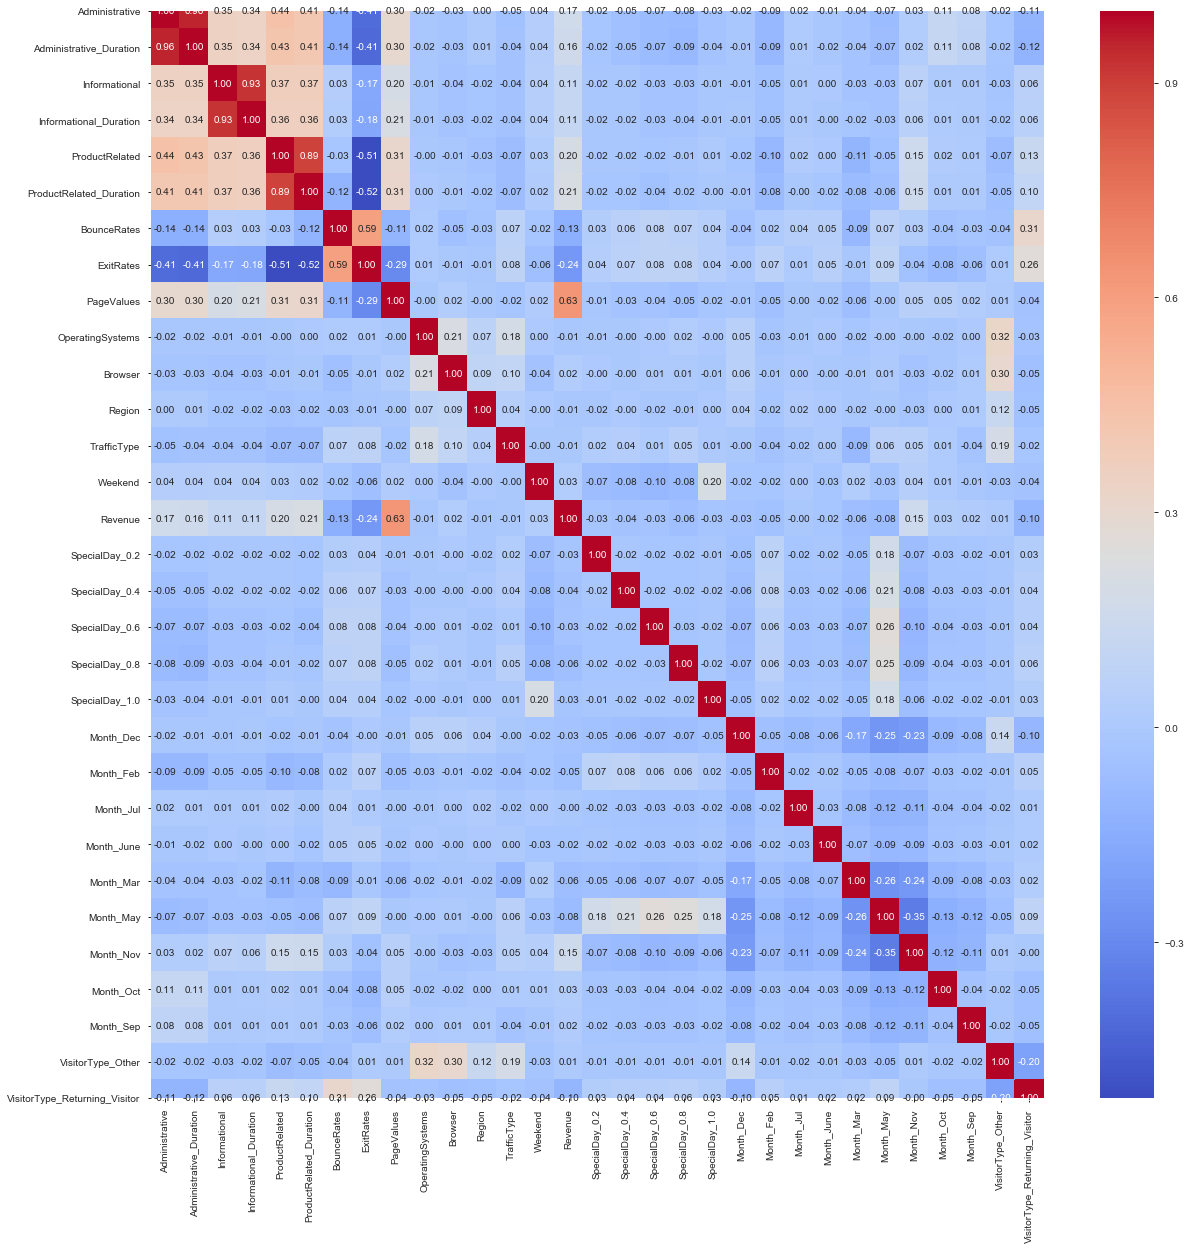

In [133]:
plt.figure(figsize=[20,20])
corr = df2.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
#plt.ylim(16, 0)
plt.show()

In [134]:
X = df2.drop('Revenue', axis=1)
y = df2['Revenue']

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [143]:
from sklearn.linear_model import LogisticRegression

In [145]:
rfc = LogisticRegression()
y_pred = rfc.fit(x_train_scaled,y_train).predict(x_test_scaled)

/Users/sshankar7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [146]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, cohen_kappa_score, classification_report

In [147]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.895412342981977
F1 Score: 0.6211671612265084
Cohen Kappa Score: 0.5609500322742011
Confusion Matrix:
 [[2965  151]
 [ 232  314]]


In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3116
           1       0.68      0.58      0.62       546

    accuracy                           0.90      3662
   macro avg       0.80      0.76      0.78      3662
weighted avg       0.89      0.90      0.89      3662

